In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo
from sklearn.preprocessing import StandardScaler


sns.set_palette("husl")


In [6]:
# Load the dataset
df = pd.read_csv('customer_satisfaction_data.csv')


print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {df['customer_id'].nunique()}")
print(f"Quarters: {df['quarter'].unique().tolist()}")



Dataset shape: (3400, 31)
Number of customers: 850
Quarters: ['Q1_2024', 'Q2_2024', 'Q3_2024', 'Q4_2024']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3400 non-null   object 
 1   quarter                     3400 non-null   object 
 2   survey_date                 3400 non-null   object 
 3   account_manager_responsive  3384 non-null   float64
 4   billing_accuracy            3387 non-null   float64
 5   budget_control              3383 non-null   float64
 6   change_management           3388 non-null   float64
 7   communication_clarity       3384 non-null   float64
 8   competitive_pricing         3385 non-null   float64
 9   cost_transparency           3390 non-null   float64
 10  documentation_help          3386 non-null   float64
 11  executive_access            3390 non-null   float64
 12  innovation_solutions        3390 non-null   float64
 13  long_term_partnership       3386 

In [9]:
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False))


                            Missing Count  Missing Percentage
trust_reliability                      22            0.647059
problem_solving                        20            0.588235
technical_documentation                19            0.558824
project_management                     17            0.500000
budget_control                         17            0.500000
training_quality                       17            0.500000
support_responsiveness                 17            0.500000
roi_demonstration                      17            0.500000
account_manager_responsive             16            0.470588
communication_clarity                  16            0.470588
competitive_pricing                    15            0.441176
value_for_money                        15            0.441176
documentation_help                     14            0.411765
long_term_partnership                  14            0.411765
system_integration                     14            0.411765
billing_

In [10]:
satisfaction_columns = [
    'technical_expertise', 'problem_solving', 'innovation_solutions', 
    'technical_documentation', 'system_integration', 'account_manager_responsive',
    'executive_access', 'trust_reliability', 'long_term_partnership', 
    'communication_clarity', 'project_management', 'timeline_adherence',
    'budget_control', 'quality_deliverables', 'change_management', 
    'cost_transparency', 'value_for_money', 'roi_demonstration',
    'competitive_pricing', 'billing_accuracy', 'support_responsiveness',
    'training_quality', 'documentation_help'
]

satisfaction_df = df[satisfaction_columns]


desc_stats = satisfaction_df.describe().T
desc_stats['missing_count'] = satisfaction_df.isnull().sum()
desc_stats['missing_pct'] = (desc_stats['missing_count'] / len(satisfaction_df)) * 100
print(desc_stats[['count', 'mean', 'std', 'min', 'max', 'missing_pct']].round(2))

                             count  mean   std  min  max  missing_pct
technical_expertise         3391.0  4.12  0.97  1.0  7.0         0.26
problem_solving             3380.0  4.11  0.99  1.0  7.0         0.59
innovation_solutions        3390.0  4.11  0.99  1.0  7.0         0.29
technical_documentation     3381.0  4.12  0.98  1.0  7.0         0.56
system_integration          3386.0  4.11  1.01  1.0  7.0         0.41
account_manager_responsive  3384.0  4.12  0.97  1.0  7.0         0.47
executive_access            3390.0  4.11  0.97  1.0  7.0         0.29
trust_reliability           3378.0  4.10  0.96  1.0  7.0         0.65
long_term_partnership       3386.0  4.10  0.97  1.0  7.0         0.41
communication_clarity       3384.0  4.09  0.96  1.0  7.0         0.47
project_management          3383.0  4.11  0.98  1.0  7.0         0.50
timeline_adherence          3392.0  4.11  0.98  1.0  7.0         0.24
budget_control              3383.0  4.10  0.98  1.0  7.0         0.50
quality_deliverables

In [ ]:
print("Rellenando con la media...")
satisfaction_df_imputed = satisfaction_df.copy()
for col in satisfaction_df_imputed.columns:
    satisfaction_df_imputed[col].fillna(satisfaction_df_imputed[col].mean(), inplace=True)

print(f"missing values: {satisfaction_df_imputed.isnull().sum().sum()}")

Rellenando con la media...
missing values: 0


C:\Users\ultim\AppData\Local\Temp\ipykernel_20776\829067986.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  satisfaction_df_imputed[col].fillna(satisfaction_df_imputed[col].mean(), inplace=True)


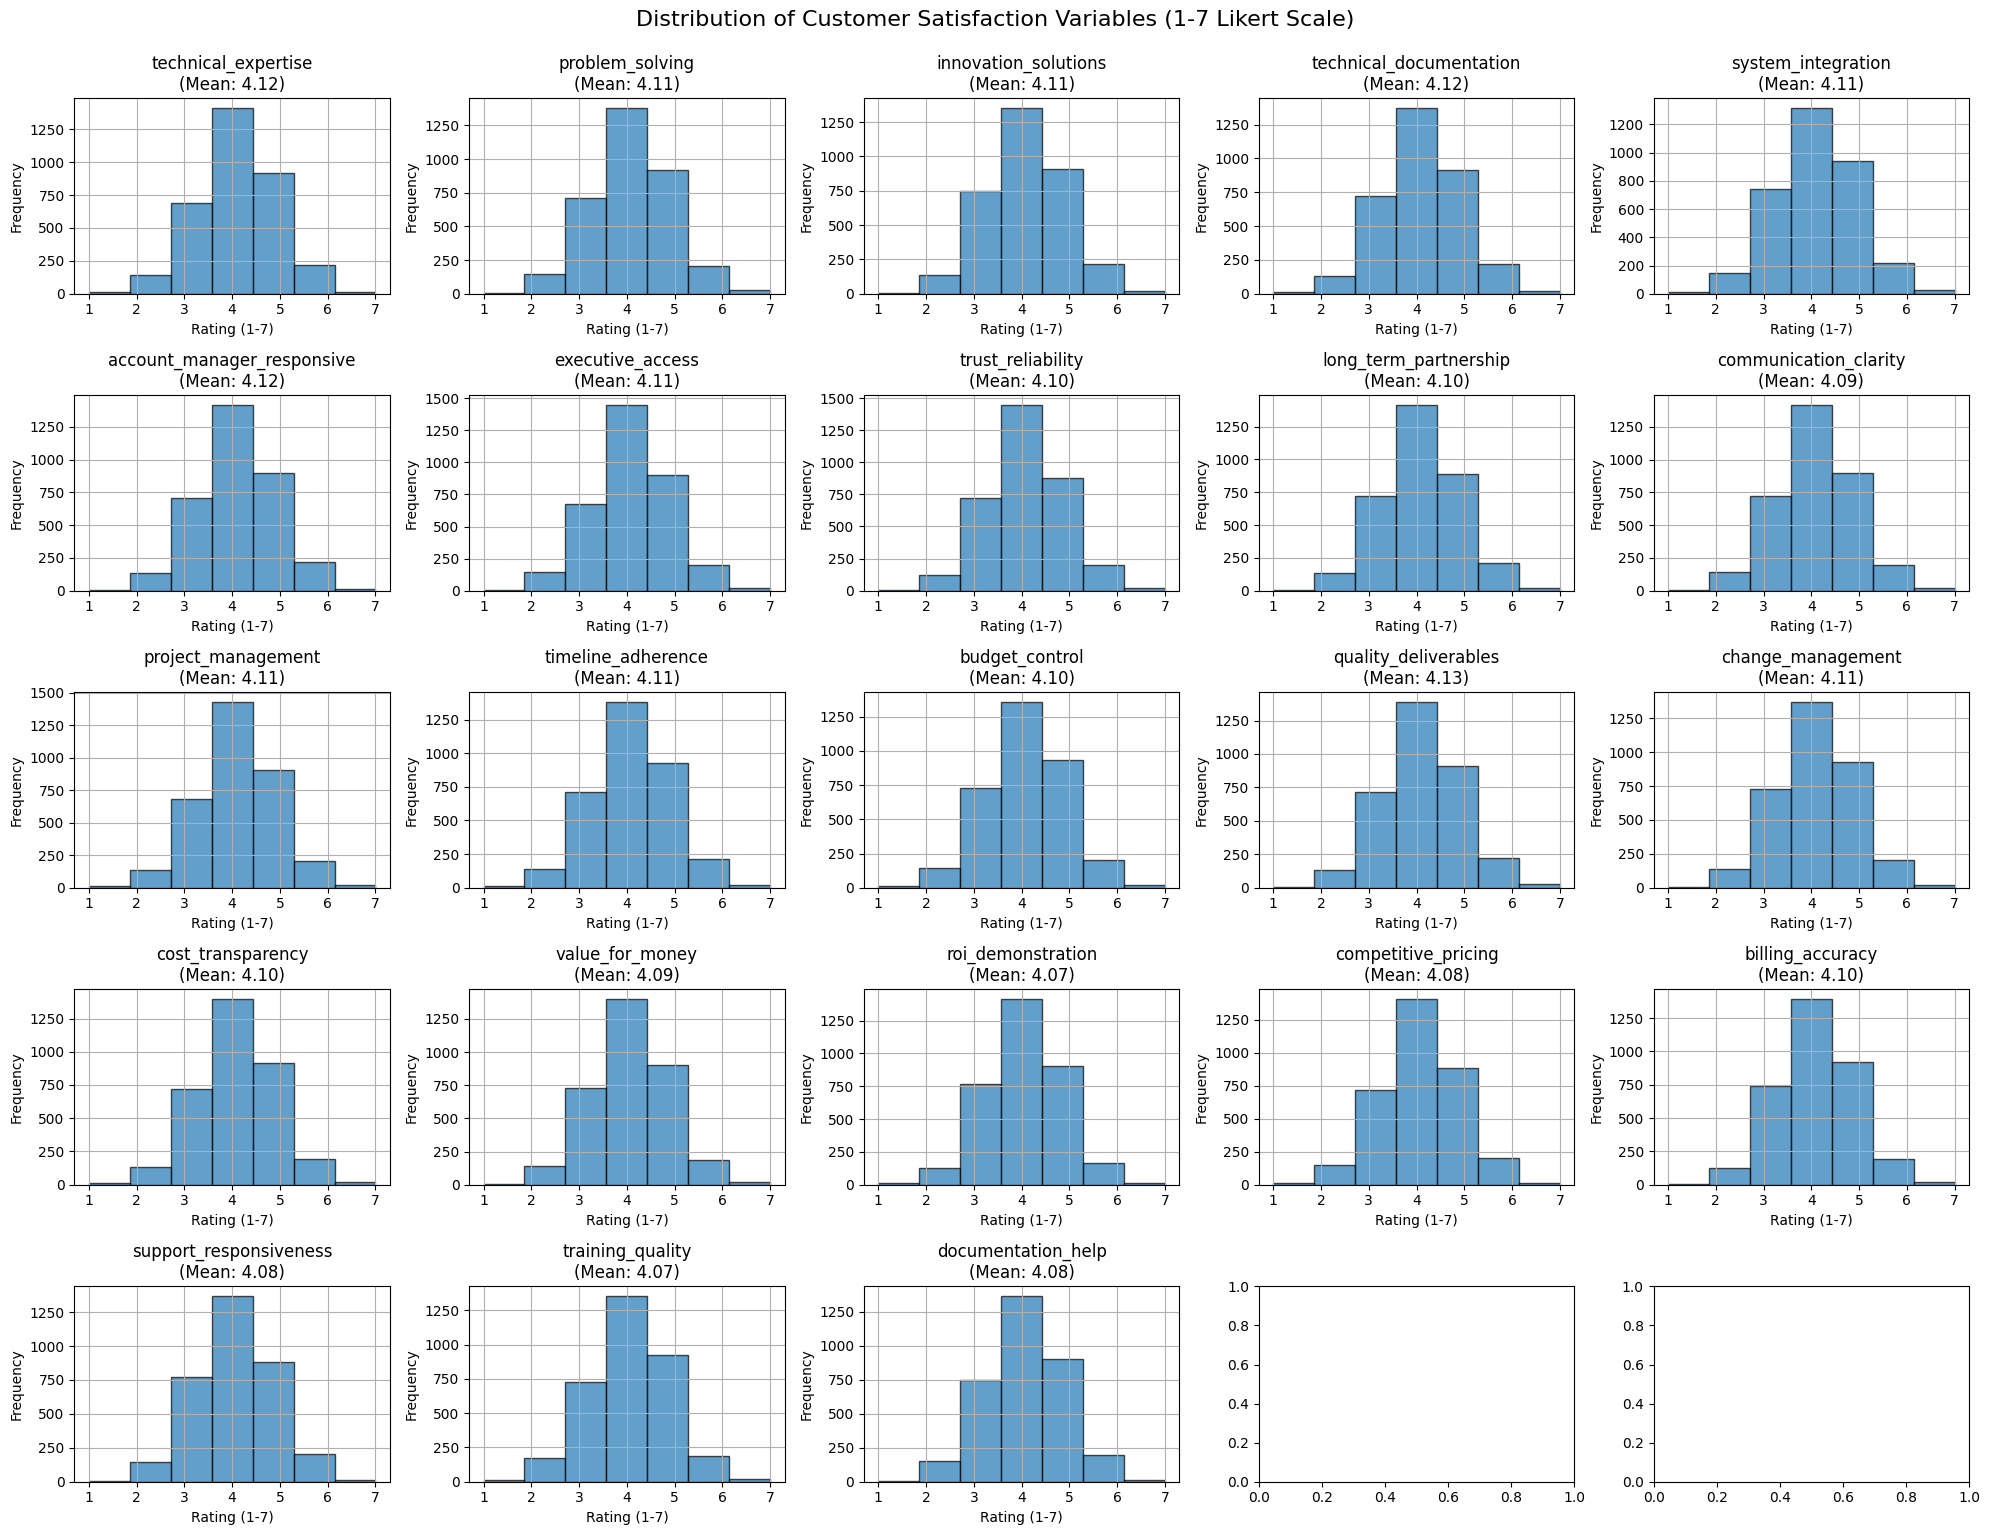

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(satisfaction_columns[:25]):
    if i < len(satisfaction_columns):
        satisfaction_df_imputed[col].hist(bins=7, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{col}\n(Mean: {satisfaction_df_imputed[col].mean():.2f})')
        axes[i].set_xlabel('Rating (1-7)')
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of Customer Satisfaction Variables (1-7 Likert Scale)', y=1.02, fontsize=16)
plt.show()

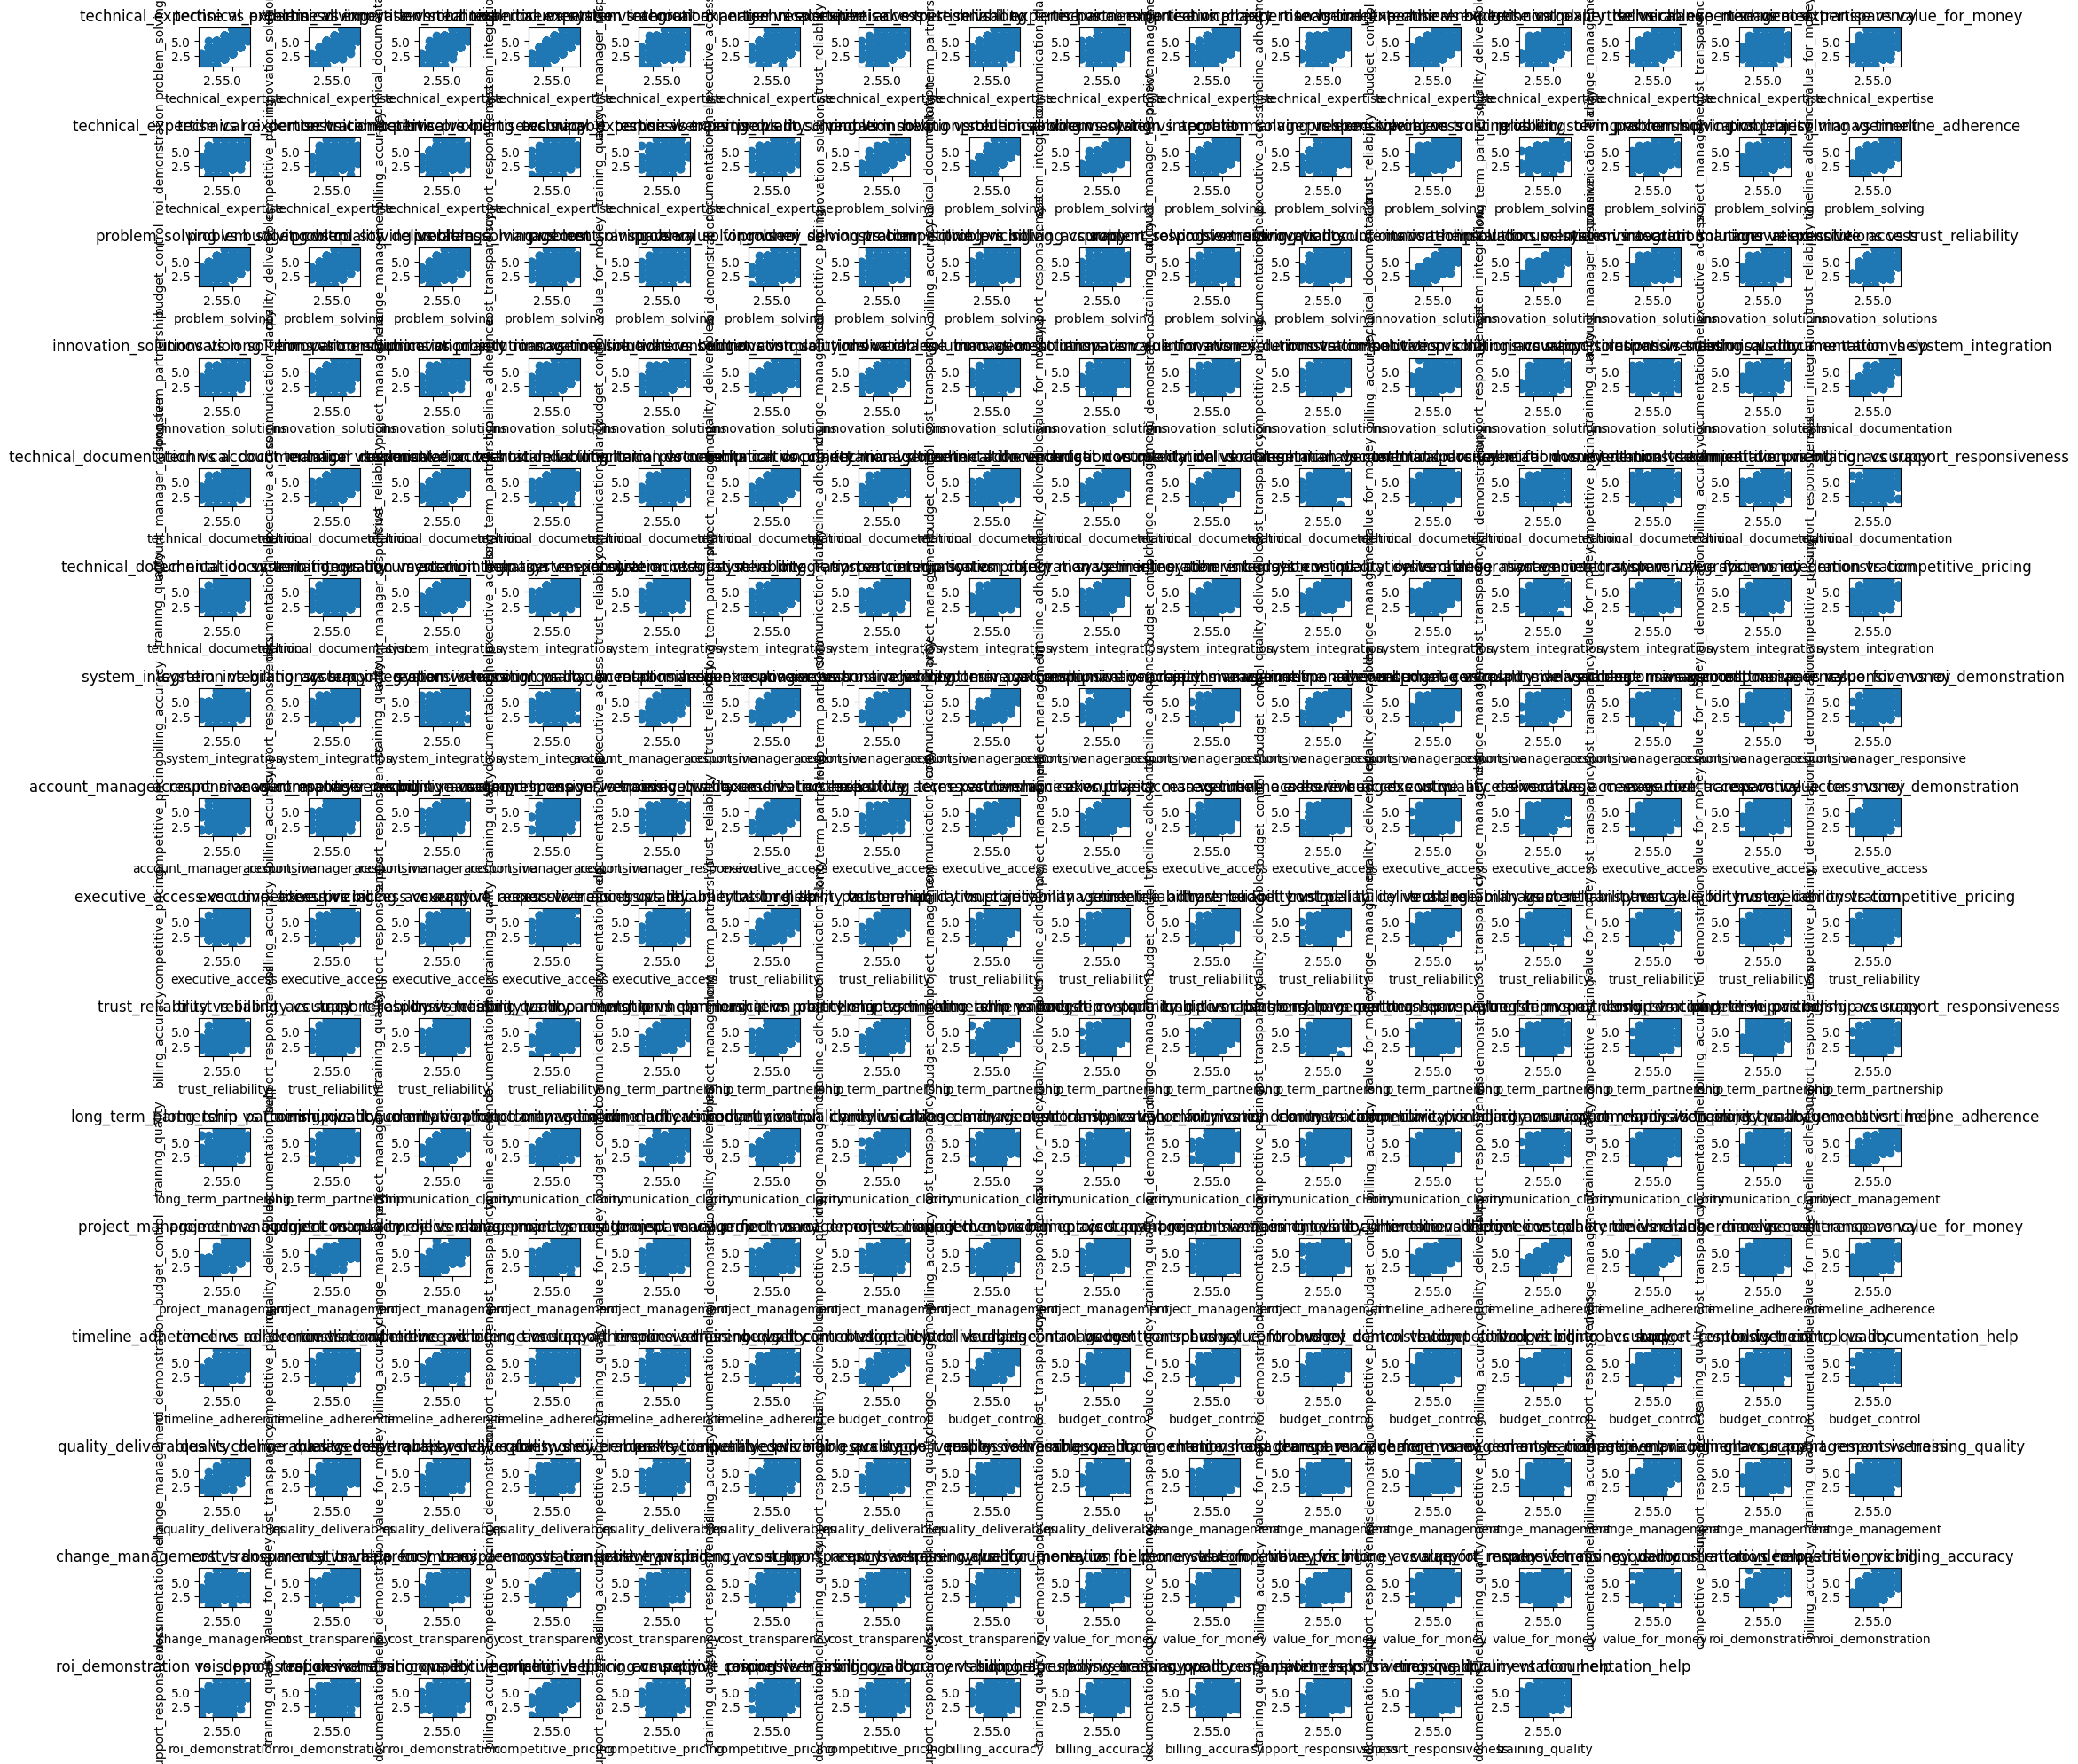

In [ ]:
variables = satisfaction_df_imputed.columns
combinations = [(variables[i], variables[j]) for i in range(len(variables)) for j in range(i + 1, len(variables))]

num_combinations = len(combinations)


fig, axs = plt.subplots(nrows=16, ncols=16, figsize=(20, 20))
axs = axs.flatten()  


for idx, (var1, var2) in enumerate(combinations):
    axs[idx].scatter(df[var1], df[var2])
    axs[idx].set_title(f'{var1} vs {var2}')
    axs[idx].set_xlabel(var1)
    axs[idx].set_ylabel(var2)

for i in range(num_combinations, len(axs)):
    fig.delaxes(axs[i])


plt.tight_layout()

plt.show()

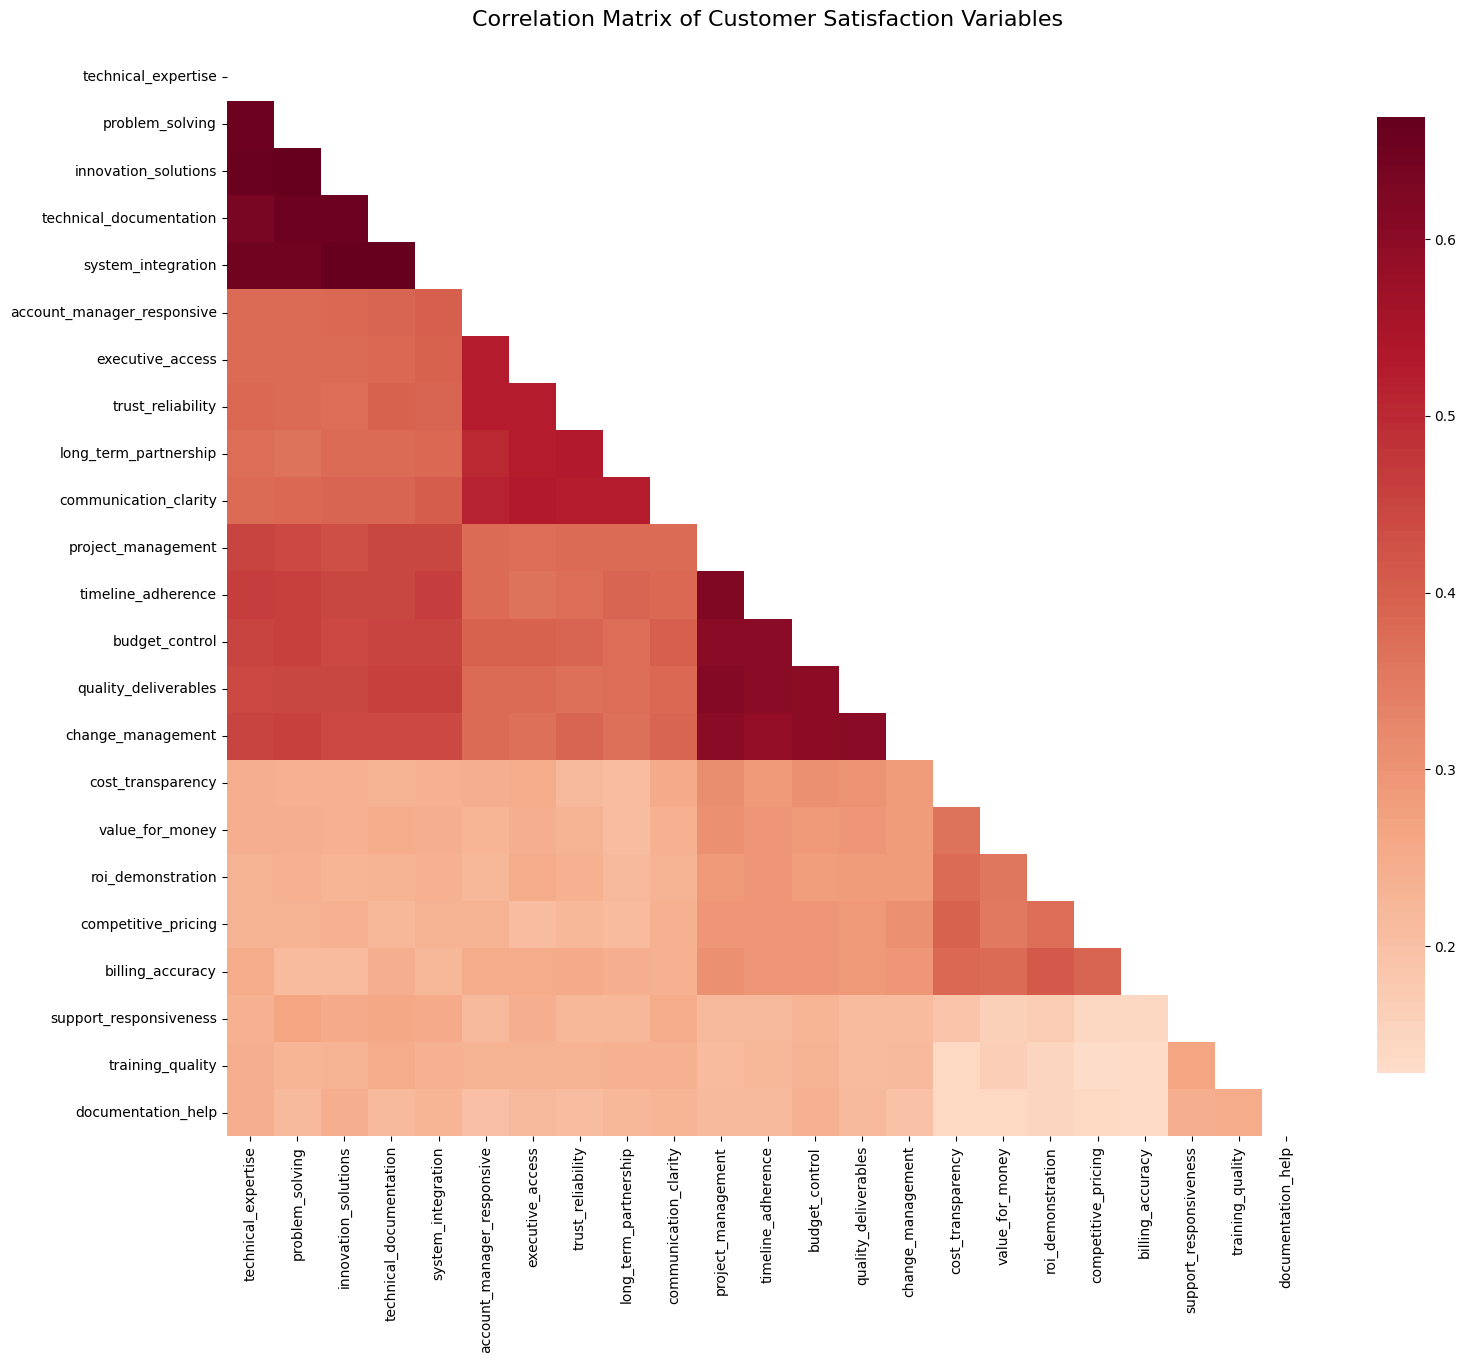

Total variable pairs: 253
Strong correlations (r ≥ 0.5): 30 (11.9%)
Moderate correlations (0.3 ≤ r < 0.5): 91 (36.0%)
Weak correlations (r < 0.3): 132 (52.2%)

Variables with adequate correlations (r ≥ 0.3): 47.8%


In [ ]:
correlation_matrix = satisfaction_df_imputed.corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Customer Satisfaction Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)]
strong_correlations = np.sum(np.abs(corr_values) >= 0.5)
moderate_correlations = np.sum((np.abs(corr_values) >= 0.3) & (np.abs(corr_values) < 0.5))
weak_correlations = np.sum(np.abs(corr_values) < 0.3)

print(f"Total variable pairs: {len(corr_values)}")
print(f"Strong correlations (|r| ≥ 0.5): {strong_correlations} ({strong_correlations/len(corr_values)*100:.1f}%)")
print(f"Moderate correlations (0.3 ≤ |r| < 0.5): {moderate_correlations} ({moderate_correlations/len(corr_values)*100:.1f}%)")
print(f"Weak correlations (|r| < 0.3): {weak_correlations} ({weak_correlations/len(corr_values)*100:.1f}%)")


adequate_correlations = strong_correlations + moderate_correlations
adequacy_pct = adequate_correlations / len(corr_values) * 100
print(f"\nVariables with adequate correlations (|r| ≥ 0.3): {adequacy_pct:.1f}%")

In [22]:

kmo_all, kmo_model = calculate_kmo(satisfaction_df_imputed)

print(f"Overall KMO Measure: {kmo_model:.3f}")

# Individual KMO valores
kmo_per_variable = pd.DataFrame({
    'Variable': satisfaction_columns,
    'KMO_Value': kmo_all
}).sort_values('KMO_Value', ascending=False)

print("\nKMO Values by Variable (Top 10):")
print(kmo_per_variable.head(10).round(3))
print("\nKMO Values by Variable (Bottom 10):")
print(kmo_per_variable.tail(10).round(3))

# Bartlett's Test of Sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square, p_value = calculate_bartlett_sphericity(satisfaction_df_imputed)
print(f"\nBartlett's Test of Sphericity:")
print(f"Chi-square: {chi_square:.2f}")
print(f"P-value: {p_value:.2e}")

Overall KMO Measure: 0.959

KMO Values by Variable (Top 10):
                      Variable  KMO_Value
12              budget_control      0.967
14           change_management      0.966
13        quality_deliverables      0.965
11          timeline_adherence      0.965
5   account_manager_responsive      0.963
9        communication_clarity      0.962
0          technical_expertise      0.962
10          project_management      0.962
3      technical_documentation      0.961
4           system_integration      0.960

KMO Values by Variable (Bottom 10):
                  Variable  KMO_Value
8    long_term_partnership      0.957
2     innovation_solutions      0.957
20  support_responsiveness      0.956
21        training_quality      0.955
22      documentation_help      0.954
16         value_for_money      0.952
15       cost_transparency      0.941
17       roi_demonstration      0.941
18     competitive_pricing      0.940
19        billing_accuracy      0.933

Bartlett's Test of Sp

In [21]:

theoretical_dimensions = {
    'Technical Excellence': ['technical_expertise', 'problem_solving', 'innovation_solutions', 
                           'technical_documentation', 'system_integration'],
    'Relationship Management': ['account_manager_responsive', 'executive_access', 'trust_reliability',
                              'long_term_partnership', 'communication_clarity'],
    'Project Delivery': ['project_management', 'timeline_adherence', 'budget_control',
                       'quality_deliverables', 'change_management'],
    'Value & Cost': ['cost_transparency', 'value_for_money', 'roi_demonstration',
                   'competitive_pricing', 'billing_accuracy'],
    'Support & Service': ['support_responsiveness', 'training_quality', 'documentation_help']
}


for dimension, variables in theoretical_dimensions.items():
    dim_corr = correlation_matrix.loc[variables, variables]
    mask = np.triu(np.ones_like(dim_corr, dtype=bool), k=1)
    within_corrs = dim_corr.values[mask]
    avg_within_corr = np.mean(within_corrs) if len(within_corrs) > 0 else 0
    
    print(f"{dimension}:")
    print(f"  - Average within-dimension correlation: {avg_within_corr:.3f}")
    print(f"  - Number of strong correlations (≥0.5): {np.sum(np.abs(within_corrs) >= 0.5)}")

Technical Excellence:
  - Average within-dimension correlation: 0.657
  - Number of strong correlations (≥0.5): 10
Relationship Management:
  - Average within-dimension correlation: 0.523
  - Number of strong correlations (≥0.5): 10
Project Delivery:
  - Average within-dimension correlation: 0.602
  - Number of strong correlations (≥0.5): 10
Value & Cost:
  - Average within-dimension correlation: 0.379
  - Number of strong correlations (≥0.5): 0
Support & Service:
  - Average within-dimension correlation: 0.253
  - Number of strong correlations (≥0.5): 0


# Parte 2

In [23]:

scaler = StandardScaler()
satisfaction_standardized = scaler.fit_transform(satisfaction_df_imputed)


fa = FactorAnalyzer(rotation=None, impute='drop')
fa.fit(satisfaction_standardized)


ev, v = fa.get_eigenvalues()
print("Eigenvalues for each potential factor:")
for i, eigenvalue in enumerate(ev[:10], 1):
    print(f"Factor {i}: {eigenvalue:.3f}")

# Kaiser Criterion - factors con eigenvalores > 1
kaiser_factors = sum(ev > 1)
print(f"\nKaiser Criterion: {kaiser_factors} factors (eigenvalues > 1)")

Eigenvalues for each potential factor:
Factor 1: 8.661
Factor 2: 1.786
Factor 3: 1.442
Factor 4: 1.202
Factor 5: 1.075
Factor 6: 0.760
Factor 7: 0.745
Factor 8: 0.650
Factor 9: 0.646
Factor 10: 0.607

Kaiser Criterion: 5 factors (eigenvalues > 1)


c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


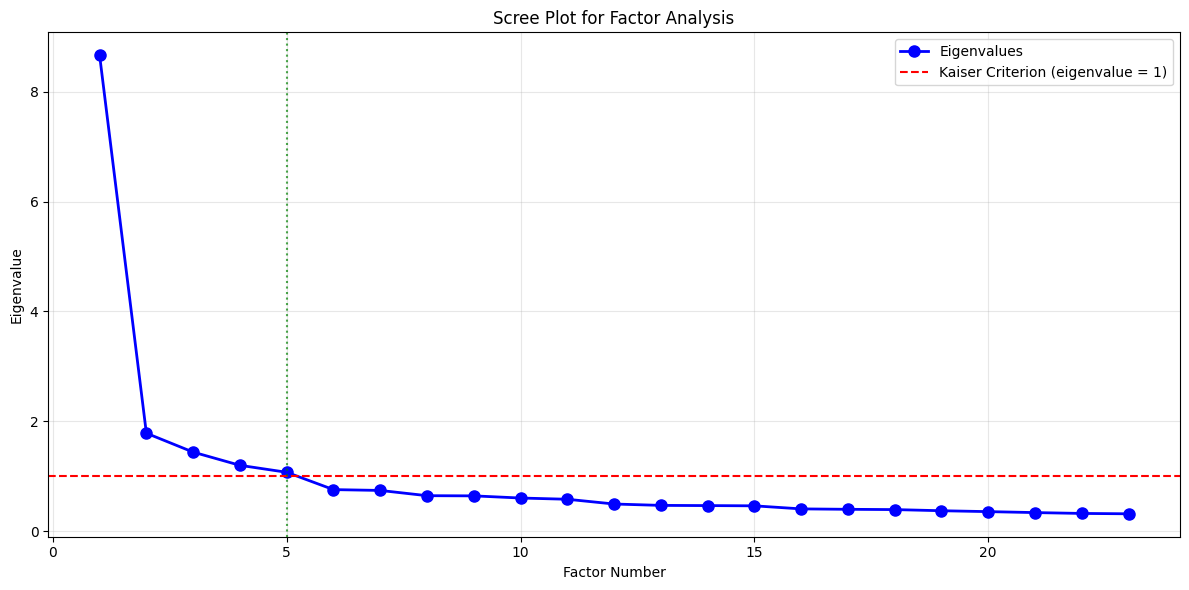

In [24]:

plt.figure(figsize=(12, 6))
factors_range = range(1, len(ev) + 1)
plt.plot(factors_range, ev, 'bo-', linewidth=2, markersize=8, label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (eigenvalue = 1)')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Factor Analysis')
plt.grid(True, alpha=0.3)
plt.legend()

# Highlight the "elbow" region
plt.axvline(x=kaiser_factors, color='g', linestyle=':', alpha=0.7, label=f'Kaiser Selection: {kaiser_factors} factors')

plt.tight_layout()
plt.show()

In [25]:

print("Varianza explicada")


factor_solutions = [3, 4, 5, 6, 7, kaiser_factors]
variance_results = []

for n_factors in factor_solutions:
    fa_temp = FactorAnalyzer(n_factors=n_factors, rotation='varimax', impute='drop')
    fa_temp.fit(satisfaction_standardized)
    variance = fa_temp.get_factor_variance()
    total_variance = sum(variance[1])  # Sum of variance proportions
    variance_results.append({
        'n_factors': n_factors,
        'variance_explained': total_variance,
        'variance_details': variance
    })
    print(f"{n_factors} factors: {total_variance:.3f} ({total_variance*100:.1f}%)")

# Varianza con la solucion kaiser
kaiser_variance = variance_results[[x['n_factors'] for x in variance_results].index(kaiser_factors)]
print(f"\nDetailed variance for {kaiser_factors} factors (Kaiser criterion):")
variance_df = pd.DataFrame({
    'Factor': range(1, kaiser_factors + 1),
    'SS Loadings': kaiser_variance['variance_details'][0],
    'Proportion Var': kaiser_variance['variance_details'][1],
    'Cumulative Var': kaiser_variance['variance_details'][2]
})
print(variance_df.round(3))

Varianza explicada
3 factors: 0.450 (45.0%)
4 factors: 0.486 (48.6%)
5 factors: 0.504 (50.4%)
6 factors: 0.510 (51.0%)
7 factors: 0.513 (51.3%)
5 factors: 0.504 (50.4%)

Detailed variance for 5 factors (Kaiser criterion):
   Factor  SS Loadings  Proportion Var  Cumulative Var
0       1        3.160           0.137           0.137
1       2        2.604           0.113           0.251
2       3        2.604           0.113           0.364
3       4        2.206           0.096           0.460
4       5        1.017           0.044           0.504


c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\

In [29]:
# Part 2.2: Factor Extraction and Rotation


# Comparar Kaiser criterion con el modelo de negocios propuesto en el diccionario (theoretical 5 factors)

optimal_factors = 5  
print(f"\n=== EXTRACTING {optimal_factors} FACTORS WITH VARIMAX ROTATION ===")


fa_final = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax', impute='drop')
fa_final.fit(satisfaction_standardized)


loadings = fa_final.loadings_


loadings_df = pd.DataFrame(
    loadings,
    index=satisfaction_columns,
    columns=[f'Factor_{i+1}' for i in range(optimal_factors)]
)

print("Factor Loadings Matrix (showing loadings > |0.4| for clarity):")

def highlight_strong_loadings(val):
    if abs(val) >= 0.5:
        return 'background-color: red'
    elif abs(val) >= 0.4:
        return 'background-color: orange'
    else:
        return ''

styled_loadings = loadings_df.style.applymap(highlight_strong_loadings)
styled_loadings.format("{:.3f}")


=== EXTRACTING 5 FACTORS WITH VARIMAX ROTATION ===
Factor Loadings Matrix (showing loadings > |0.4| for clarity):


c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ultim\AppData\Local\Temp\ipykernel_20776\3807503130.py:33: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_loadings = loadings_df.style.applymap(highlight_strong_loadings)


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
technical_expertise,0.691,0.247,0.216,0.160,0.174
problem_solving,0.711,0.242,0.213,0.148,0.168
innovation_solutions,0.723,0.224,0.220,0.143,0.174
technical_documentation,0.697,0.237,0.237,0.149,0.172
system_integration,0.707,0.237,0.242,0.150,0.165
account_manager_responsive,0.216,0.193,0.613,0.171,0.145
executive_access,0.204,0.175,0.629,0.175,0.176
trust_reliability,0.204,0.188,0.640,0.165,0.145
long_term_partnership,0.195,0.194,0.628,0.139,0.174
communication_clarity,0.207,0.195,0.613,0.174,0.194


In [ ]:
#tabla mas limpia
primary_loadings = []
for variable in loadings_df.index:
    loadings_row = loadings_df.loc[variable]
    primary_factor = loadings_row.abs().idxmax()
    primary_loading = loadings_row[primary_factor]
    
    if abs(primary_loading) >= 0.4:
        primary_loadings.append({
            'Variable': variable,
            'Primary Factor': primary_factor,
            'Loading': primary_loading,
            'Theoretical Dimension': next(
                (dim for dim, vars_list in theoretical_dimensions.items() 
                 if variable in vars_list), 'Unknown'
            )
        })

primary_loadings_df = pd.DataFrame(primary_loadings)
print("\nPrimary Factor Assignments (loadings ≥ |0.4|):")
print(primary_loadings_df.sort_values(['Primary Factor', 'Loading'], ascending=[True, False]).round(3))


Primary Factor Assignments (loadings ≥ |0.4|):
                      Variable Primary Factor  Loading  \
2         innovation_solutions       Factor_1    0.723   
1              problem_solving       Factor_1    0.711   
4           system_integration       Factor_1    0.707   
3      technical_documentation       Factor_1    0.697   
0          technical_expertise       Factor_1    0.691   
10          project_management       Factor_2    0.653   
13        quality_deliverables       Factor_2    0.637   
11          timeline_adherence       Factor_2    0.635   
14           change_management       Factor_2    0.625   
12              budget_control       Factor_2    0.622   
7            trust_reliability       Factor_3    0.640   
6             executive_access       Factor_3    0.629   
8        long_term_partnership       Factor_3    0.628   
5   account_manager_responsive       Factor_3    0.613   
9        communication_clarity       Factor_3    0.613   
19            billing_ac

In [34]:

print("INTERPRETATION AND BUSINESS MEANING")


factor_interpretations = {}
for factor in loadings_df.columns:
    factor_vars = primary_loadings_df[primary_loadings_df['Primary Factor'] == factor]
    

    strong_vars = factor_vars[factor_vars['Loading'].abs() >= 0.5]
    

    avg_loading = factor_vars['Loading'].abs().mean()
    

    variable_names = strong_vars['Variable'].tolist()
    theoretical_dims = strong_vars['Theoretical Dimension'].value_counts()
    
    factor_interpretations[factor] = {
        'strong_variables': variable_names,
        'theoretical_alignment': theoretical_dims,
        'avg_loading_strength': avg_loading,
        'n_variables': len(factor_vars)
    }
    
    print(f"\n{factor}:")
    print(f" Number of variables: {len(factor_vars)}")
    print(f" Average loading strength: {avg_loading:.3f}")
    print(f" Strongly loading variables (>0.5):")
    for var in variable_names[:5]:  # Show top 5
        loading_val = loadings_df.loc[var, factor]
        print(f"  {var} ({loading_val:.3f})")
    

    if 'technical' in str(variable_names).lower() and 'expertise' in str(variable_names).lower():
        print(f" BUSINESS INTERPRETATION: Technical Excellence & Innovation")
    elif 'relationship' in str(variable_names).lower() or 'trust' in str(variable_names).lower():
        print(f" BUSINESS INTERPRETATION: Relationship Quality & Partnership")
    elif 'project' in str(variable_names).lower() or 'timeline' in str(variable_names).lower():
        print(f" BUSINESS INTERPRETATION: Project Execution & Delivery")
    elif 'cost' in str(variable_names).lower() or 'value' in str(variable_names).lower():
        print(f" BUSINESS INTERPRETATION: Value & Financial Management")
    elif 'support' in str(variable_names).lower() or 'training' in str(variable_names).lower():
        print(f" BUSINESS INTERPRETATION: Support & Service Quality")
    else:
        print(f" BUSINESS INTERPRETATION: Mixed Dimension")

INTERPRETATION AND BUSINESS MEANING

Factor_1:
 Number of variables: 5
 Average loading strength: 0.706
 Strongly loading variables (>0.5):
  technical_expertise (0.691)
  problem_solving (0.711)
  innovation_solutions (0.723)
  technical_documentation (0.697)
  system_integration (0.707)
 BUSINESS INTERPRETATION: Technical Excellence & Innovation

Factor_2:
 Number of variables: 5
 Average loading strength: 0.634
 Strongly loading variables (>0.5):
  project_management (0.653)
  timeline_adherence (0.635)
  budget_control (0.622)
  quality_deliverables (0.637)
  change_management (0.625)
 BUSINESS INTERPRETATION: Project Execution & Delivery

Factor_3:
 Number of variables: 5
 Average loading strength: 0.625
 Strongly loading variables (>0.5):
  account_manager_responsive (0.613)
  executive_access (0.629)
  trust_reliability (0.640)
  long_term_partnership (0.628)
  communication_clarity (0.613)
 BUSINESS INTERPRETATION: Relationship Quality & Partnership

Factor_4:
 Number of variab

In [35]:
# Comparando diferentes soluciones de facotres
print("COMPARISON OF FACTOR SOLUTIONS")

solutions_to_test = [4, 5, 6, kaiser_factors]
comparison_results = []

for n_factors in solutions_to_test:
    fa_compare = FactorAnalyzer(n_factors=n_factors, rotation='varimax', impute='drop')
    fa_compare.fit(satisfaction_standardized)
    variance = fa_compare.get_factor_variance()
    total_variance = sum(variance[1])
    
    loadings_compare = fa_compare.loadings_
    well_defined_factors = 0
    for factor_idx in range(n_factors):
        strong_loadings = sum(abs(loadings_compare[:, factor_idx]) >= 0.4)
        if strong_loadings >= 3:
            well_defined_factors += 1
    
    comparison_results.append({
        'n_factors': n_factors,
        'variance_explained': total_variance,
        'well_defined_factors': well_defined_factors,
        'efficiency': total_variance / n_factors  
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.round(3))

COMPARISON OF FACTOR SOLUTIONS
   n_factors  variance_explained  well_defined_factors  efficiency
0          4               0.486                     4       0.122
1          5               0.504                     5       0.101
2          6               0.510                     5       0.085
3          5               0.504                     5       0.101


c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FINAL FACTOR SOLUTION RECOMMENDATION


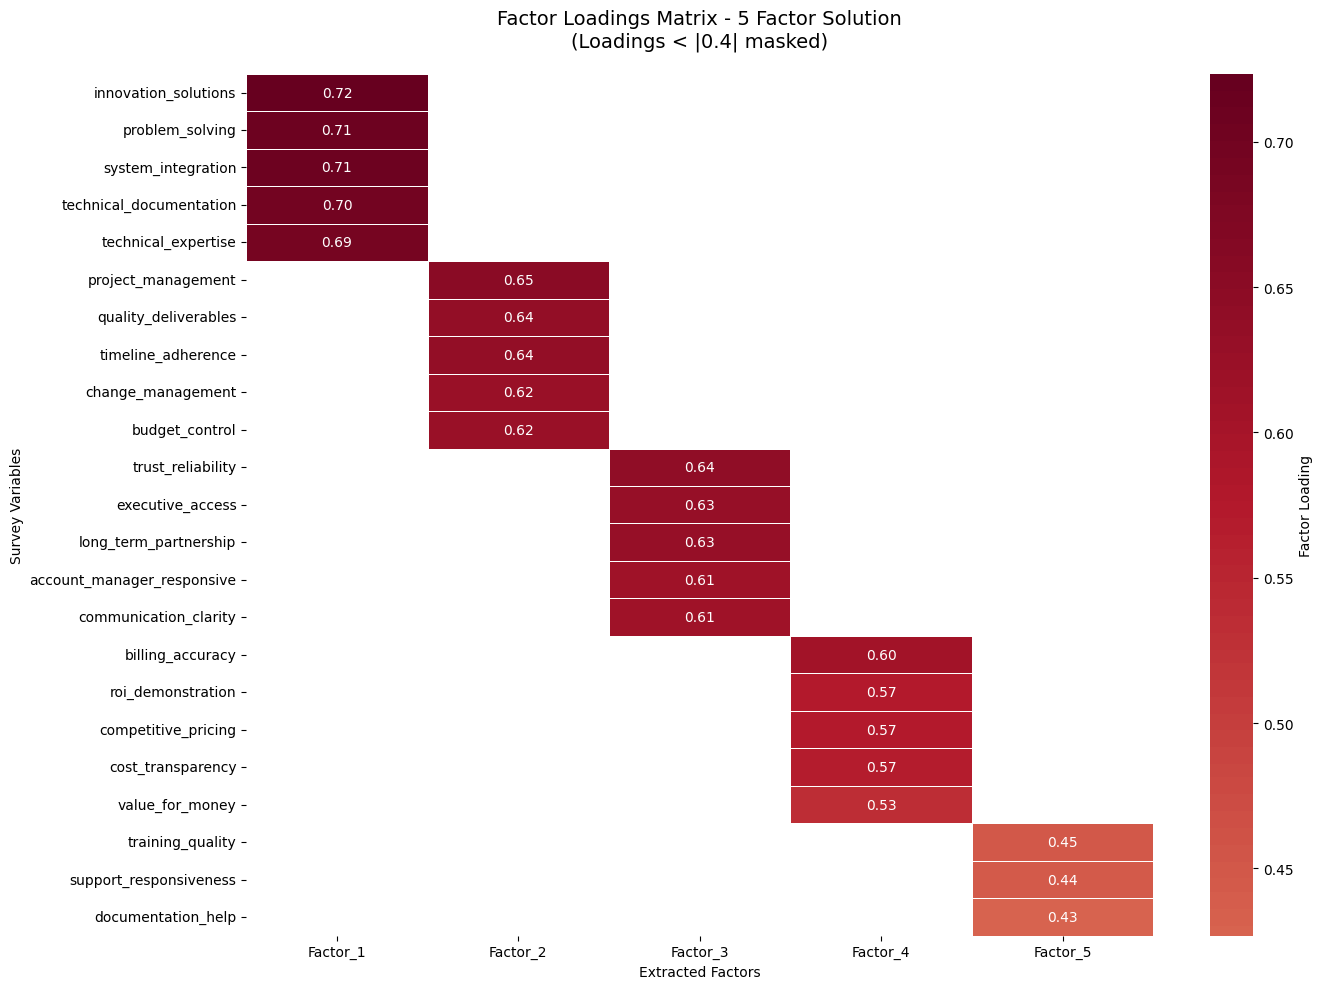

In [ ]:
print("FINAL FACTOR SOLUTION RECOMMENDATION")


plt.figure(figsize=(14, 10))


loadings_plot = loadings_df.copy()


max_factor = loadings_plot.abs().idxmax(axis=1)
max_loading = loadings_plot.abs().max(axis=1)


loadings_plot['max_factor'] = max_factor
loadings_plot['max_loading'] = max_loading


loadings_plot = loadings_plot.sort_values(['max_factor', 'max_loading'], ascending=[True, False])


factor_columns = [f'Factor_{i+1}' for i in range(optimal_factors)]
mask = np.abs(loadings_plot[factor_columns]) < 0.4

sns.heatmap(loadings_plot[factor_columns], 
            annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, mask=mask,
            cbar_kws={'label': 'Factor Loading'})
plt.title(f'Factor Loadings Matrix - {optimal_factors} Factor Solution\n(Loadings < |0.4| masked)', fontsize=14, pad=20)
plt.ylabel('Survey Variables')
plt.xlabel('Extracted Factors')
plt.tight_layout()
plt.show()

# Parte 3

In [40]:
# Part 3.1: Professional Factor Interpretation
print("BUSINESS INTERPRETATION & STRATEGIC APPLICATION ")



factor_scores = fa_final.transform(satisfaction_standardized)
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Factor_{i+1}' for i in range(optimal_factors)]
)


analysis_df = df.copy()
for i in range(optimal_factors):
    analysis_df[f'Factor_{i+1}_Score'] = factor_scores[:, i]

BUSINESS INTERPRETATION & STRATEGIC APPLICATION 


c:\Users\ultim\Documents\IDM\CS  Factor A\Factor_analizer\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [41]:
def interpret_factor(factor_num, loadings_df, threshold=0.5):
    factor_col = f'Factor_{factor_num}'
    factor_loadings = loadings_df[factor_col].sort_values(ascending=False)
    

    strong_positive = factor_loadings[factor_loadings >= threshold]
    strong_negative = factor_loadings[factor_loadings <= -threshold]
    
    print(f"FACTOR {factor_num} ANALYSIS:")
    print(f"Variables with strong loadings (≥ {threshold}):")
    
    all_strong_vars = []
    for var, loading in strong_positive.items():
        print(f"   ✅ {var}: {loading:.3f}")
        all_strong_vars.append((var, loading, 'positive'))
    
    for var, loading in strong_negative.items():
        print(f"   ❌ {var}: {loading:.3f}")
        all_strong_vars.append((var, loading, 'negative'))
    
    return all_strong_vars

# Interpret each factor
factor_interpretations = {}
for i in range(1, optimal_factors + 1):
    strong_vars = interpret_factor(i, loadings_df)
    factor_interpretations[f'Factor_{i}'] = strong_vars

FACTOR 1 ANALYSIS:
Variables with strong loadings (≥ 0.5):
   ✅ innovation_solutions: 0.723
   ✅ problem_solving: 0.711
   ✅ system_integration: 0.707
   ✅ technical_documentation: 0.697
   ✅ technical_expertise: 0.691
FACTOR 2 ANALYSIS:
Variables with strong loadings (≥ 0.5):
   ✅ project_management: 0.653
   ✅ quality_deliverables: 0.637
   ✅ timeline_adherence: 0.635
   ✅ change_management: 0.625
   ✅ budget_control: 0.622
FACTOR 3 ANALYSIS:
Variables with strong loadings (≥ 0.5):
   ✅ trust_reliability: 0.640
   ✅ executive_access: 0.629
   ✅ long_term_partnership: 0.628
   ✅ account_manager_responsive: 0.613
   ✅ communication_clarity: 0.613
FACTOR 4 ANALYSIS:
Variables with strong loadings (≥ 0.5):
   ✅ billing_accuracy: 0.605
   ✅ roi_demonstration: 0.574
   ✅ competitive_pricing: 0.571
   ✅ cost_transparency: 0.570
   ✅ value_for_money: 0.533
FACTOR 5 ANALYSIS:
Variables with strong loadings (≥ 0.5):


In [42]:

business_labels = {
    'Factor_1': "Technical Excellence & Innovation Capability",
    'Factor_2': "Strategic Partnership & Relationship Quality", 
    'Factor_3': "Project Execution & Delivery Reliability",
    'Factor_4': "Value Demonstration & Financial Transparency",
    'Factor_5': "Support Service & Client Enablement"
}

factor_descriptions = {
    'Factor_1': "Core technical expertise, problem-solving ability, and innovative solution development",
    'Factor_2': "Trust-based relationships, executive engagement, and long-term partnership focus",
    'Factor_3': "Project management excellence, timeline adherence, and quality deliverables",
    'Factor_4': "Cost transparency, ROI demonstration, and competitive value proposition",
    'Factor_5': "Responsive support, quality training, and helpful documentation"
}

for i in range(1, optimal_factors + 1):
    factor_key = f'Factor_{i}'
    print(f"\n🏷️  {factor_key}: {business_labels[factor_key]}")
    print(f"   📝 {factor_descriptions[factor_key]}")
    
    # Show key drivers
    strong_vars = factor_interpretations[factor_key]
    if strong_vars:
        top_drivers = [var[0] for var in strong_vars[:3]]  # Top 3 variables
        print(f"   🔑 Key Drivers: {', '.join(top_drivers)}")


🏷️  Factor_1: Technical Excellence & Innovation Capability
   📝 Core technical expertise, problem-solving ability, and innovative solution development
   🔑 Key Drivers: innovation_solutions, problem_solving, system_integration

🏷️  Factor_2: Strategic Partnership & Relationship Quality
   📝 Trust-based relationships, executive engagement, and long-term partnership focus
   🔑 Key Drivers: project_management, quality_deliverables, timeline_adherence

🏷️  Factor_3: Project Execution & Delivery Reliability
   📝 Project management excellence, timeline adherence, and quality deliverables
   🔑 Key Drivers: trust_reliability, executive_access, long_term_partnership

🏷️  Factor_4: Value Demonstration & Financial Transparency
   📝 Cost transparency, ROI demonstration, and competitive value proposition
   🔑 Key Drivers: billing_accuracy, roi_demonstration, competitive_pricing

🏷️  Factor_5: Support Service & Client Enablement
   📝 Responsive support, quality training, and helpful documentation


<Figure size 1600x1000 with 0 Axes>

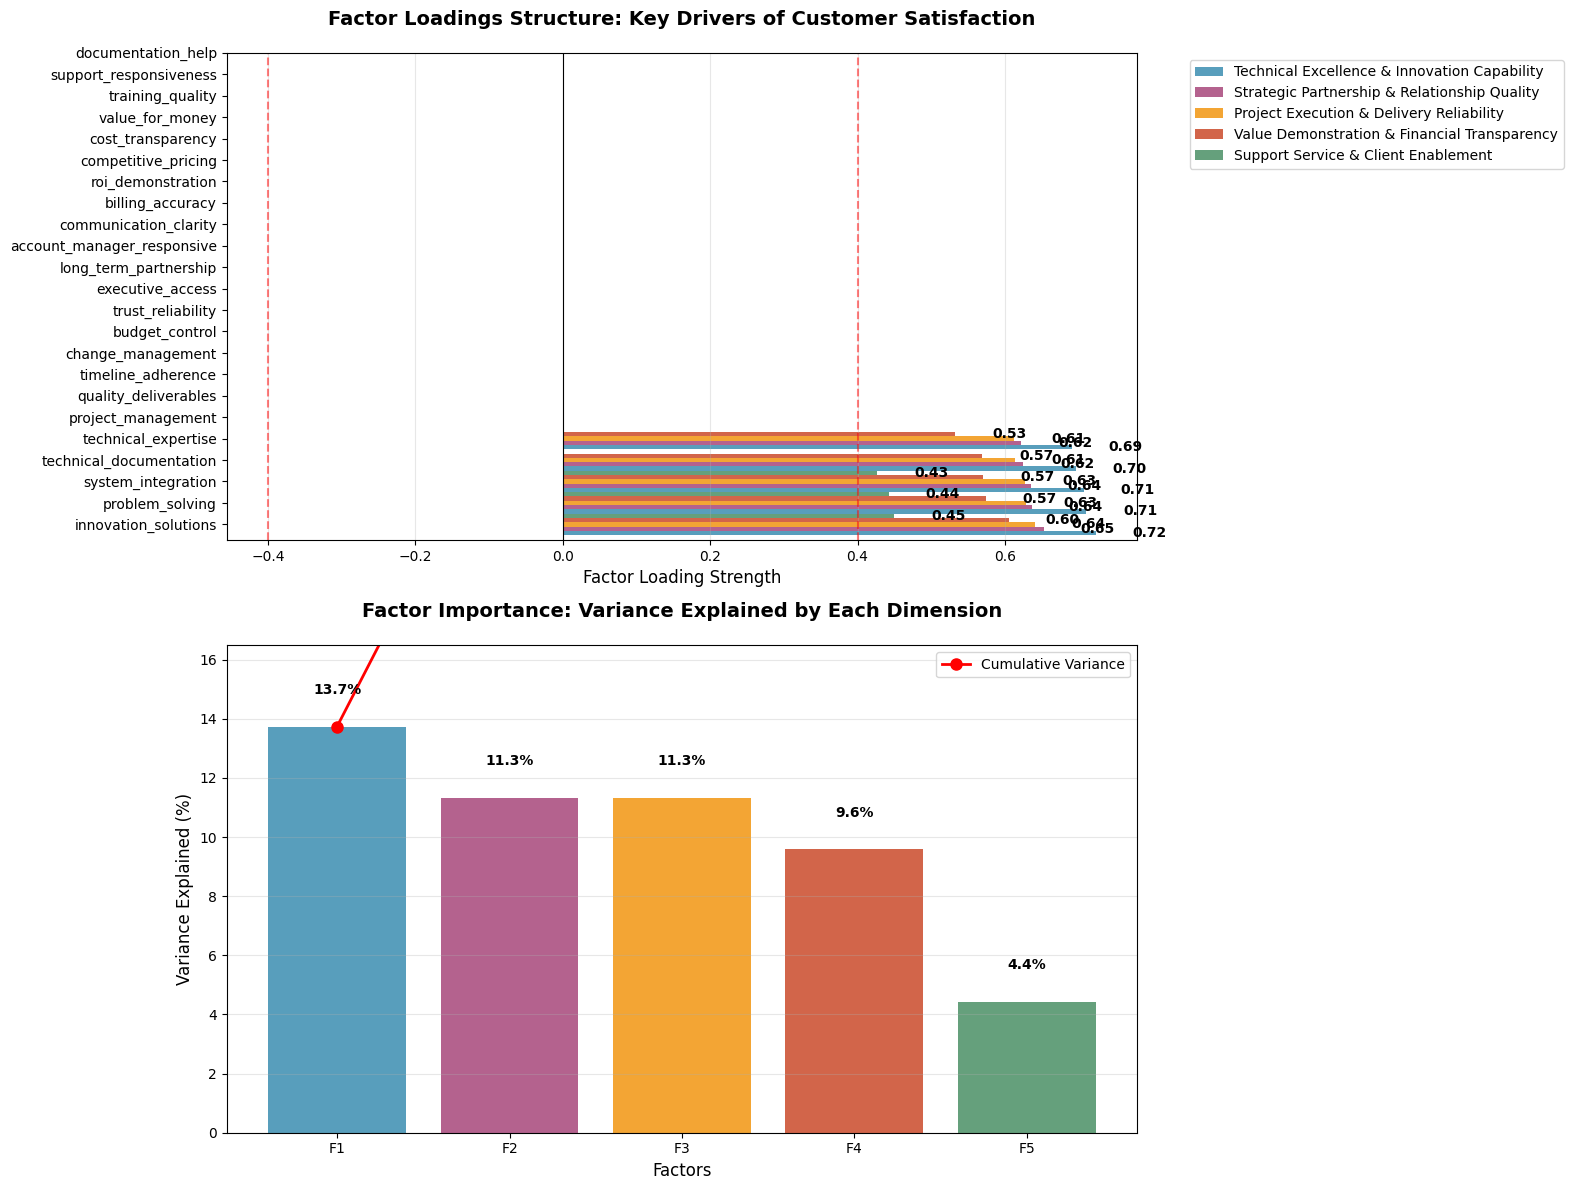


📈 Total Variance Explained: 50.4%
💡 Interpretation: Higher variance = greater importance in driving customer satisfaction


In [50]:
plt.figure(figsize=(16, 10))


plot_data = loadings_df.copy()
factor_columns = [f'Factor_{i+1}' for i in range(optimal_factors)]


plot_data['Primary_Factor'] = plot_data[factor_columns].abs().idxmax(axis=1)
plot_data['Loading_Strength'] = plot_data[factor_columns].abs().max(axis=1)


strong_loadings = plot_data[plot_data['Loading_Strength'] >= 0.4].copy()
strong_loadings = strong_loadings.sort_values(['Primary_Factor', 'Loading_Strength'], 
                                            ascending=[True, False])

factors_to_plot = [f'Factor_{i}' for i in range(1, optimal_factors+1)]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E885B']

fig, axes = plt.subplots(2, 1, figsize=(16, 12))


for i, factor in enumerate(factors_to_plot):
    factor_data = strong_loadings[strong_loadings[factor].abs() >= 0.4]
    if not factor_data.empty:

        loadings_vals = factor_data[factor].sort_values(ascending=False)
        

        y_pos = np.arange(len(loadings_vals))
        bars = axes[0].barh(y_pos + i*0.2, loadings_vals, height=0.2, 
                          color=colors[i], alpha=0.8, label=business_labels[factor])
        

        for bar_idx, (val, bar) in enumerate(zip(loadings_vals, bars)):
            axes[0].text(val + (0.05 if val > 0 else -0.1), bar_idx + i*0.2, 
                       f'{val:.2f}', ha='left' if val > 0 else 'right', 
                       va='center', fontweight='bold')

if not strong_loadings.empty:
    axes[0].set_yticks(np.arange(len(strong_loadings)) + 0.4)
    axes[0].set_yticklabels(strong_loadings.index, fontsize=10)

axes[0].set_xlabel('Factor Loading Strength', fontsize=12)
axes[0].set_title('Factor Loadings Structure: Key Drivers of Customer Satisfaction', 
                 fontsize=14, fontweight='bold', pad=20)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].axvline(x=0, color='black', linewidth=0.8)
axes[0].axvline(x=0.4, color='red', linestyle='--', alpha=0.5, label='Threshold (0.4)')
axes[0].axvline(x=-0.4, color='red', linestyle='--', alpha=0.5)
axes[0].grid(axis='x', alpha=0.3)


variance_info = fa_final.get_factor_variance()
factors = [f'F{i+1}' for i in range(optimal_factors)]
variance_pct = variance_info[1] * 100  # Proportion variance
cumulative_variance = variance_info[2] * 100  # Cumulative variance

bars = axes[1].bar(factors, variance_pct, color=colors[:optimal_factors], alpha=0.8)
axes[1].plot(factors, cumulative_variance, 'ro-', linewidth=2, markersize=8, 
           label='Cumulative Variance')


for bar, value in zip(bars, variance_pct):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
               f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

axes[1].set_xlabel('Factors', fontsize=12)
axes[1].set_ylabel('Variance Explained (%)', fontsize=12)
axes[1].set_title('Factor Importance: Variance Explained by Each Dimension', 
                 fontsize=14, fontweight='bold', pad=20)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
if len(variance_pct) > 0:
    axes[1].set_ylim(0, max(variance_pct) * 1.2)

plt.tight_layout()
plt.show()

print(f"\n📈 Total Variance Explained: {cumulative_variance[-1]:.1f}%")
print("💡 Interpretation: Higher variance = greater importance in driving customer satisfaction")


3.2 BUSINESS IMPACT ANALYSIS
-----------------------------------
🔍 Analyzing how each factor drives business outcomes...
📊 Factor Correlations with Business Outcomes:
         overall_satisfaction nps_score renewal_likelihood revenue_growth_pct  \
Factor_1             0.440838  0.277408           0.343258           0.427327   
Factor_2             0.415182  0.286339           0.324047           0.401422   
Factor_3             0.417329  0.297043           0.335101           0.437702   
Factor_4              0.39597  0.260304           0.332034           0.389007   
Factor_5             0.370604  0.286023           0.305516           0.375121   

         referrals_generated  
Factor_1            0.267833  
Factor_2            0.283986  
Factor_3            0.273505  
Factor_4            0.251636  
Factor_5            0.230108  


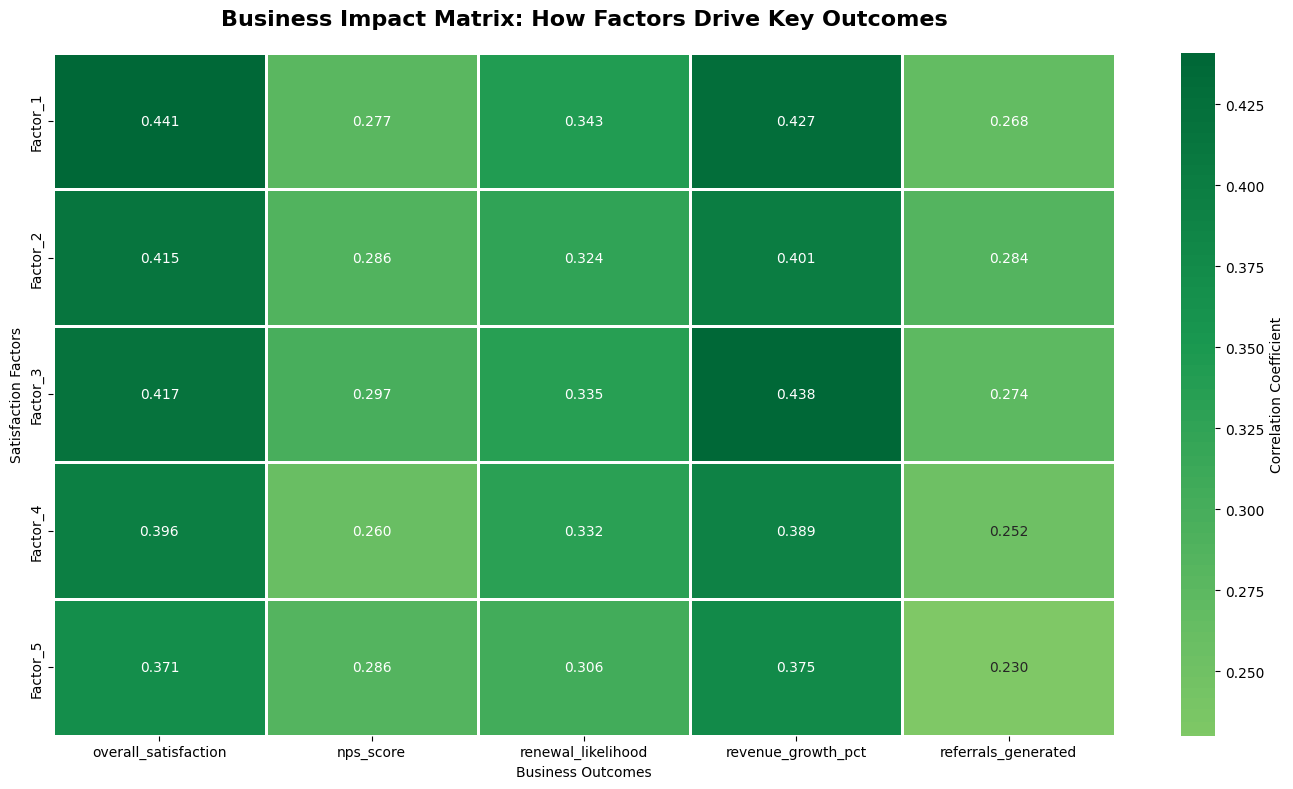


💡 Strong positive correlations indicate factors that strongly drive business success
💡 Negative correlations suggest areas that might be hurting performance


In [ ]:
# 3.2 Business Insights: Factor Impact on Outcomes
print("\n3.2 BUSINESS IMPACT ANALYSIS")
print("-" * 35)
print("🔍 Analyzing how each factor drives business outcomes...")

outcome_variables = ['overall_satisfaction', 'nps_score', 'renewal_likelihood', 
                    'revenue_growth_pct', 'referrals_generated']

available_outcomes = [col for col in outcome_variables if col in analysis_df.columns]

impact_correlations = pd.DataFrame(index=[f'Factor_{i+1}' for i in range(optimal_factors)],
                                 columns=available_outcomes)

for outcome in available_outcomes:

    valid_idx = analysis_df[outcome].notna()
    for i in range(optimal_factors):
        factor_col = f'Factor_{i+1}_Score'
        corr = np.corrcoef(analysis_df.loc[valid_idx, factor_col], 
                          analysis_df.loc[valid_idx, outcome])[0,1]
        impact_correlations.loc[f'Factor_{i+1}', outcome] = corr

print("📊 Factor Correlations with Business Outcomes:")
print(impact_correlations.round(3))


plt.figure(figsize=(14, 8))


impact_numeric = impact_correlations.astype(float)


sns.heatmap(impact_numeric, annot=True, cmap='RdYlGn', center=0,
            fmt='.3f', linewidths=1, linecolor='white',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Business Impact Matrix: How Factors Drive Key Outcomes', 
         fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Satisfaction Factors')
plt.xlabel('Business Outcomes')
plt.tight_layout()
plt.show()

print("\n💡 Strong positive correlations indicate factors that strongly drive business success")
print("💡 Negative correlations suggest areas that might be hurting performance")


🎯 STRATEGIC PRIORITIZATION MATRIX
----------------------------------------

🏆 FACTOR PRIORITIZATION RANKING:
Rank | Factor | Overall Impact | Key Business Outcome
-----------------------------------------------------------------
 1.   Project Execution & Delivery R 0.352        revenue_growth_pct (0.438)
 2.   Technical Excellence & Innovat 0.351        overall_satisfaction (0.441)
 3.   Strategic Partnership & Relati 0.342        overall_satisfaction (0.415)
 4.   Value Demonstration & Financia 0.326        overall_satisfaction (0.396)
 5.   Support Service & Client Enabl 0.313        revenue_growth_pct (0.375)


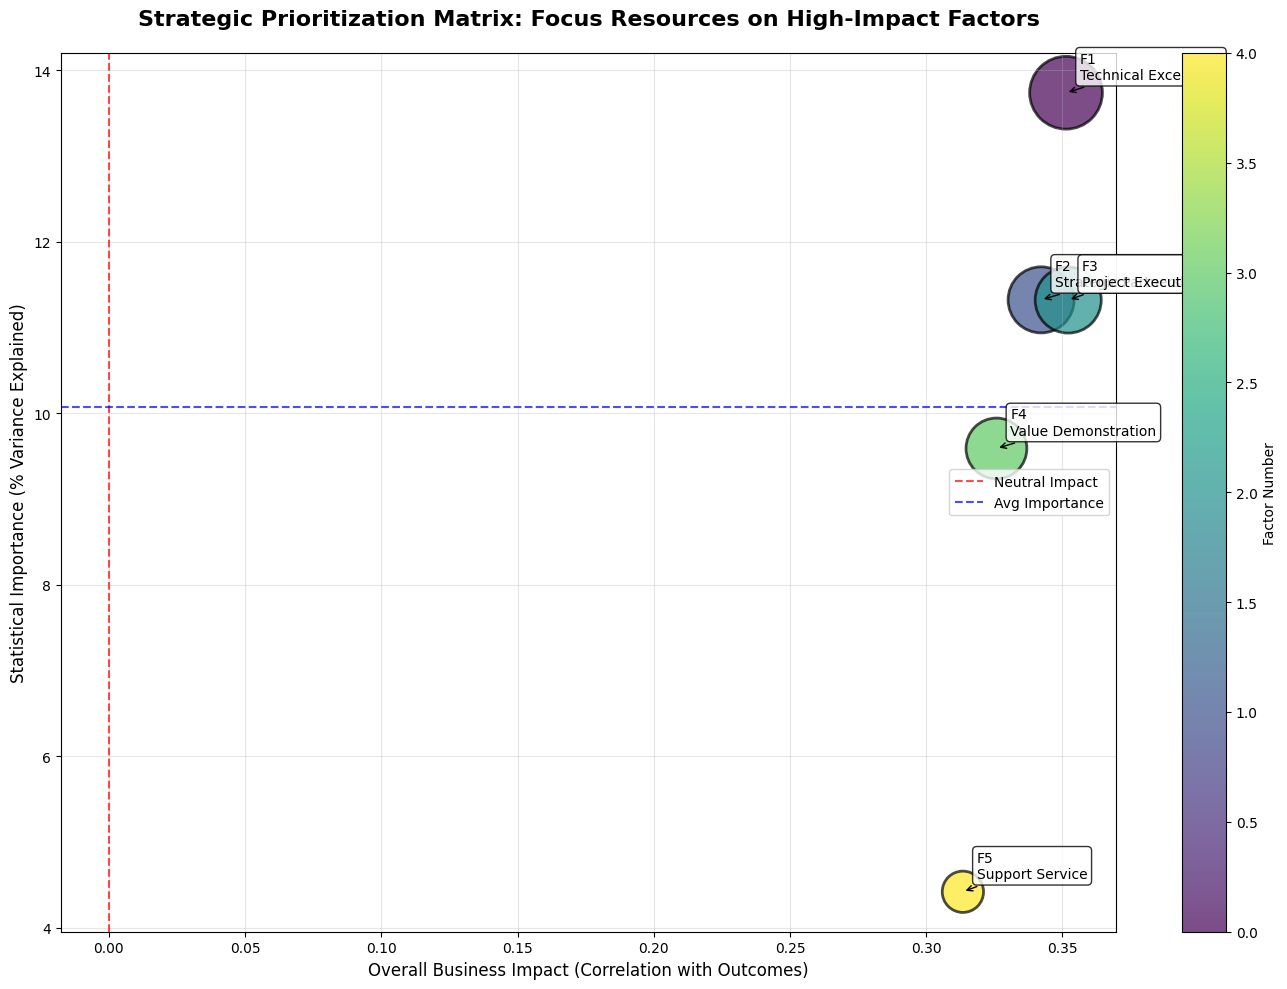


💡 INTERPRETATION GUIDE:
• Top-right quadrant: High impact & high importance → PRIORITY INVESTMENTS
• Top-left quadrant: High importance but lower impact → MAINTAIN & OPTIMIZE
• Bottom-right quadrant: High impact but lower importance → MONITOR & LEVERAGE
• Bottom-left quadrant: Lower impact & importance → STANDARD OPERATIONS


In [53]:
# CORRECTED: Strategic Prioritization Matrix
print("\n🎯 STRATEGIC PRIORITIZATION MATRIX")
print("-" * 40)

# Recalculate impact correlations to ensure clean numeric data
impact_correlations = pd.DataFrame(index=[f'Factor_{i+1}' for i in range(optimal_factors)],
                                 columns=available_outcomes)

for outcome in available_outcomes:
    valid_idx = analysis_df[outcome].notna()
    for i in range(optimal_factors):
        factor_col = f'Factor_{i+1}_Score'
        corr = np.corrcoef(analysis_df.loc[valid_idx, factor_col], 
                          analysis_df.loc[valid_idx, outcome])[0,1]
        impact_correlations.loc[f'Factor_{i+1}', outcome] = corr

# Convert to numeric and ensure clean DataFrame
impact_numeric = impact_correlations.astype(float)

# Calculate overall impact score using only numeric columns
impact_numeric['Overall_Impact'] = impact_numeric[available_outcomes].mean(axis=1)

# Create a separate DataFrame for display purposes
impact_display = impact_numeric.copy()
impact_display['Business_Label'] = [business_labels[f'Factor_{i+1}'] for i in range(optimal_factors)]

# Sort by impact
impact_sorted = impact_display.sort_values('Overall_Impact', ascending=False)

print("\n🏆 FACTOR PRIORITIZATION RANKING:")
print("Rank | Factor | Overall Impact | Key Business Outcome")
print("-" * 65)

for rank, (factor, row) in enumerate(impact_sorted.iterrows(), 1):
    strongest_outcome = impact_numeric.loc[factor, available_outcomes].abs().idxmax()
    strongest_corr = impact_numeric.loc[factor, strongest_outcome]
    
    print(f"{rank:2d}.   {business_labels[factor][:30]:30} {row['Overall_Impact']:.3f}        {strongest_outcome} ({strongest_corr:.3f})")

# Create strategic prioritization plot
plt.figure(figsize=(14, 10))

# Ensure variance_info is available
if 'variance_info' not in locals():
    variance_info = fa_final.get_factor_variance()

# Use variance explained as importance and correlation as impact
importance = variance_info[1] * 100  # Variance explained
impact_scores = impact_numeric['Overall_Impact'].values

# Create bubble chart
scatter = plt.scatter(impact_scores, importance, 
                     s=importance*200, alpha=0.7, c=range(optimal_factors), 
                     cmap='viridis', edgecolors='black', linewidth=2)

# Add labels
for i, (factor, label) in enumerate(business_labels.items()):
    plt.annotate(f"F{i+1}\n{label.split('&')[0].strip()}", 
                (impact_scores[i], importance[i]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Neutral Impact')
plt.axhline(y=np.mean(importance), color='blue', linestyle='--', alpha=0.7, label='Avg Importance')

plt.xlabel('Overall Business Impact (Correlation with Outcomes)', fontsize=12)
plt.ylabel('Statistical Importance (% Variance Explained)', fontsize=12)
plt.title('Strategic Prioritization Matrix: Focus Resources on High-Impact Factors', 
         fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Factor Number')
plt.tight_layout()
plt.show()

print("\n💡 INTERPRETATION GUIDE:")
print("• Top-right quadrant: High impact & high importance → PRIORITY INVESTMENTS")
print("• Top-left quadrant: High importance but lower impact → MAINTAIN & OPTIMIZE") 
print("• Bottom-right quadrant: High impact but lower importance → MONITOR & LEVERAGE")
print("• Bottom-left quadrant: Lower impact & importance → STANDARD OPERATIONS")

In [46]:
# Actionable Recommendations
print("\n🚀 ACTIONABLE RECOMMENDATIONS FOR TECHNOSERVE")
print("=" * 55)

# Get top 2 factors for focused recommendations
top_factors = impact_sorted.head(2)

for i, (factor, row) in enumerate(top_factors.iterrows(), 1):
    print(f"\n🎯 PRIORITY #{i}: {business_labels[factor]}")
    print(f"   Impact Score: {row['Overall_Impact']:.3f}")
    
    # Get strong variables for this factor
    strong_vars = [var[0] for var in factor_interpretations[factor] if var[2] == 'positive']
    
    print(f"   🔧 KEY IMPROVEMENT AREAS:")
    for var in strong_vars[:3]:  # Top 3 variables to focus on
        print(f"      • {var.replace('_', ' ').title()}")
    
    print(f"   💡 STRATEGIC ACTIONS:")
    
    # Context-specific recommendations
    if 'Technical' in business_labels[factor]:
        print("      - Invest in advanced technical training and certifications")
        print("      - Create innovation labs for cutting-edge solution development")
        print("      - Establish technical excellence recognition programs")
        
    elif 'Partnership' in business_labels[factor]:
        print("      - Develop executive relationship management program")
        print("      - Implement quarterly strategic business reviews")
        print("      - Create client advisory board for partnership feedback")
        
    elif 'Project' in business_labels[factor]:
        print("      - Enhance project management methodology and tools")
        print("      - Implement predictive timeline and budget analytics")
        print("      - Develop quality assurance frameworks for deliverables")
        
    elif 'Value' in business_labels[factor]:
        print("      - Create ROI demonstration toolkit and case studies")
        print("      - Implement transparent cost breakdown reporting")
        print("      - Develop value-based pricing models")
        
    elif 'Support' in business_labels[factor]:
        print("      - Establish 24/7 premium support channels")
        print("      - Develop comprehensive training certification programs")
        print("      - Create knowledge base with AI-powered assistance")

print(f"\n📊 EXPECTED BUSINESS IMPACT:")
print(f"   By focusing on these priority areas, TechnoServe can potentially improve:")
for outcome in available_outcomes[:3]:
    max_corr_factor = impact_numeric[outcome].abs().idxmax()
    max_corr = impact_numeric.loc[max_corr_factor, outcome]
    print(f"   • {outcome.replace('_', ' ').title()}: {max_corr:.1%} correlation with {business_labels[max_corr_factor].split('&')[0].strip()}")

print(f"\n⏰ RECOMMENDED TIMELINE:")
print("   Quarter 1-2: Focus on Priority #1 initiatives")
print("   Quarter 3-4: Expand to Priority #2 while measuring #1 impact")
print("   Ongoing: Monitor factor scores quarterly as leading indicators")


🚀 ACTIONABLE RECOMMENDATIONS FOR TECHNOSERVE

🎯 PRIORITY #1: Project Execution & Delivery Reliability
   Impact Score: 0.352
   🔧 KEY IMPROVEMENT AREAS:
      • Trust Reliability
      • Executive Access
      • Long Term Partnership
   💡 STRATEGIC ACTIONS:
      - Enhance project management methodology and tools
      - Implement predictive timeline and budget analytics
      - Develop quality assurance frameworks for deliverables

🎯 PRIORITY #2: Technical Excellence & Innovation Capability
   Impact Score: 0.351
   🔧 KEY IMPROVEMENT AREAS:
      • Innovation Solutions
      • Problem Solving
      • System Integration
   💡 STRATEGIC ACTIONS:
      - Invest in advanced technical training and certifications
      - Create innovation labs for cutting-edge solution development
      - Establish technical excellence recognition programs

📊 EXPECTED BUSINESS IMPACT:
   By focusing on these priority areas, TechnoServe can potentially improve:
   • Overall Satisfaction: 44.1% correlation wi

Equipo 7  
Ricardo Villarreal Bazán A01666859  
Bertin Flores Silva A01660604  